#**Python Operations for Features Analysis**

# **Mean Median Mode**

### Mean

The mean value is the average value.

To calculate the mean, find the sum of all values, and divide the sum by the number of values:

In [102]:
import numpy

speed = [99,86,87,88,111,86,103,87,94,78,77,85,86]

x = numpy.mean(speed)

print(x)

89.76923076923077


### Median

The median value is the value in the middle, after you have sorted all the values:

In [103]:
import numpy

speed = [99,86,87,88,111,86,103,87,94,78,77,85,86]

x = numpy.median(speed)

print(x)

87.0


In [104]:
import numpy

speed = [99,86,87,88,86,103,87,94,78,77,85,86]

x = numpy.median(speed)

print(x)

86.5


### Mode

The Mode value is the value that appears the most number of times:

In [105]:
from scipy import stats

speed = [99,86,87,88,111,86,103,87,94,78,77,85,86]

x = stats.mode(speed)

print(x)

ModeResult(mode=86, count=3)


#**Standard Deviation**

Standard deviation is a number that describes how spread out the values are.

A low standard deviation means that most of the numbers are close to the mean (average) value.

A high standard deviation means that the values are spread out over a wider range.

Example: This time we have registered the speed of 7 cars:

In [106]:
import numpy

speed = [86,87,88,86,87,85,86]

x = numpy.std(speed)

print(x)

0.9035079029052513


Let us do the same with a selection of numbers with a wider range:

In [107]:
import numpy

speed = [32,111,138,28,59,77,97]

x = numpy.std(speed)

print(x)

37.84501153334721


# **Normal Data Distribution**

A typical normal data distribution:

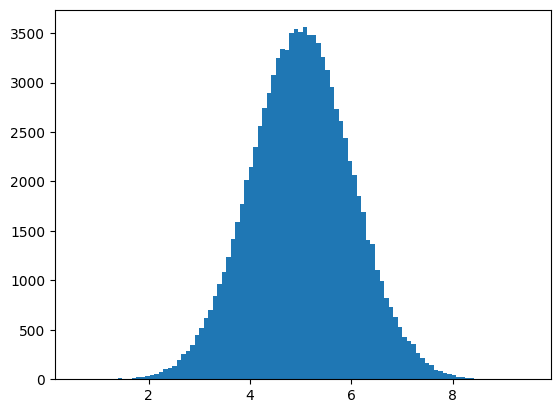

In [108]:
import numpy
import matplotlib.pyplot as plt

x = numpy.random.normal(5.0, 1.0, 100000)

plt.hist(x, 100)
plt.show()

#**Cross Validation**

##K-Fold CV

In [109]:
from sklearn import datasets
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import KFold, cross_val_score

X, y = datasets.load_iris(return_X_y=True)

clf = DecisionTreeClassifier(random_state=42)

k_folds = KFold(n_splits = 5)

scores = cross_val_score(clf, X, y, cv = k_folds)

print("Cross Validation Scores: ", scores)
print("Average CV Score: ", scores.mean())
print("Number of CV Scores used in Average: ", len(scores))

Cross Validation Scores:  [1.         1.         0.83333333 0.93333333 0.8       ]
Average CV Score:  0.9133333333333333
Number of CV Scores used in Average:  5


#**Confusion Matrix**

Confusion matrixes can be created by predictions made from a logistic regression.

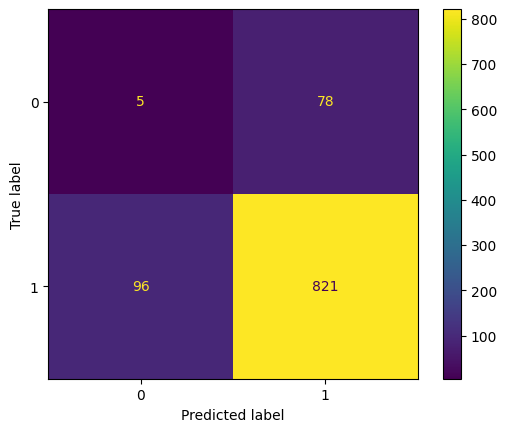

In [110]:
import matplotlib.pyplot as plt
import numpy
from sklearn import metrics

actual = numpy.random.binomial(1,.9,size = 1000)
predicted = numpy.random.binomial(1,.9,size = 1000)

confusion_matrix = metrics.confusion_matrix(actual, predicted)

cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = [0, 1])

cm_display.plot()
plt.show()

#**AUC-ROC Curve**

##Imbalanced Data

In [111]:
import numpy as np
from sklearn.metrics import accuracy_score, confusion_matrix, roc_auc_score, roc_curve

n = 10000
ratio = .95
n_0 = int((1-ratio) * n)
n_1 = int(ratio * n)

y = np.array([0] * n_0 + [1] * n_1)
# below are the probabilities obtained from a hypothetical model that always predicts the majority class
# probability of predicting class 1 is going to be 100%
y_proba = np.array([1]*n)
y_pred = y_proba > .5

print(f'accuracy score: {accuracy_score(y, y_pred)}')
cf_mat = confusion_matrix(y, y_pred)
print('Confusion matrix')
print(cf_mat)
print(f'class 0 accuracy: {cf_mat[0][0]/n_0}')
print(f'class 1 accuracy: {cf_mat[1][1]/n_1}')

accuracy score: 0.95
Confusion matrix
[[   0  500]
 [   0 9500]]
class 0 accuracy: 0.0
class 1 accuracy: 1.0


Although we obtain a very high accuracy, the model provided no information about the data so it's not useful. We accurately predict class 1 100% of the time while inaccurately predict class 0 0% of the time. At the expense of accuracy, it might be better to have a model that can somewhat separate the two classes.

In [112]:
# below are the probabilities obtained from a hypothetical model that doesn't always predict the mode
y_proba_2 = np.array(
    np.random.uniform(0, .7, n_0).tolist() +
    np.random.uniform(.3, 1, n_1).tolist()
)
y_pred_2 = y_proba_2 > .5

print(f'accuracy score: {accuracy_score(y, y_pred_2)}')
cf_mat = confusion_matrix(y, y_pred_2)
print('Confusion matrix')
print(cf_mat)
print(f'class 0 accuracy: {cf_mat[0][0]/n_0}')
print(f'class 1 accuracy: {cf_mat[1][1]/n_1}')

accuracy score: 0.7223
Confusion matrix
[[ 362  138]
 [2639 6861]]
class 0 accuracy: 0.724
class 1 accuracy: 0.7222105263157895


For the second set of predictions, we do not have as high of an accuracy score as the first but the accuracy for each class is more balanced. Using accuracy as an evaluation metric we would rate the first model higher than the second even though it doesn't tell us anything about the data.

In cases like this, using another evaluation metric like AUC would be preferred.

In [113]:
import matplotlib.pyplot as plt

def plot_roc_curve(true_y, y_prob):
    """
    plots the roc curve based of the probabilities
    """

    fpr, tpr, thresholds = roc_curve(true_y, y_prob)
    plt.plot(fpr, tpr)
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')

###Model 1:

model 1 AUC score: 0.5


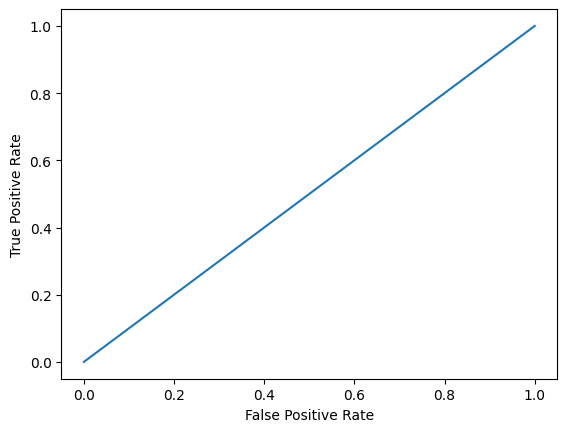

In [114]:
plot_roc_curve(y, y_proba)
print(f'model 1 AUC score: {roc_auc_score(y, y_proba)}')

###Model 2:

model 2 AUC score: 0.8458381052631578


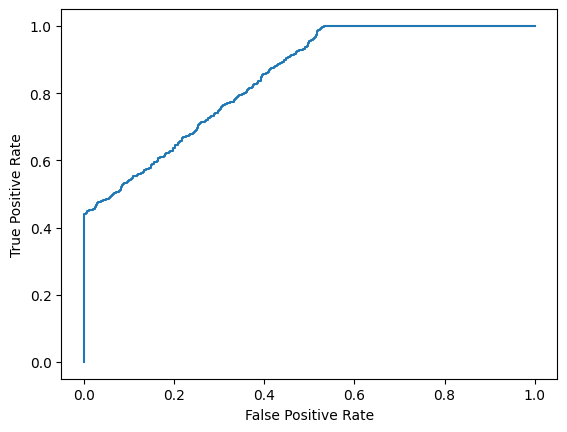

In [115]:
plot_roc_curve(y, y_proba_2)
print(f'model 2 AUC score: {roc_auc_score(y, y_proba_2)}')

##Probabilities

In the data below, we have two sets of probabilites from hypothetical models. The first has probabilities that are not as "confident" when predicting the two classes (the probabilities are close to .5). The second has probabilities that are more "confident" when predicting the two classes (the probabilities are close to the extremes of 0 or 1).

In [116]:
import numpy as np

n = 10000
y = np.array([0] * n + [1] * n)
#
y_prob_1 = np.array(
    np.random.uniform(.25, .5, n//2).tolist() +
    np.random.uniform(.3, .7, n).tolist() +
    np.random.uniform(.5, .75, n//2).tolist()
)
y_prob_2 = np.array(
    np.random.uniform(0, .4, n//2).tolist() +
    np.random.uniform(.3, .7, n).tolist() +
    np.random.uniform(.6, 1, n//2).tolist()
)

print(f'model 1 accuracy score: {accuracy_score(y, y_prob_1>.5)}')
print(f'model 2 accuracy score: {accuracy_score(y, y_prob_2>.5)}')

print(f'model 1 AUC score: {roc_auc_score(y, y_prob_1)}')
print(f'model 2 AUC score: {roc_auc_score(y, y_prob_2)}')

model 1 accuracy score: 0.7523
model 2 accuracy score: 0.7486
model 1 AUC score: 0.77958404
model 2 AUC score: 0.8592730700000001


Plot Model 1:

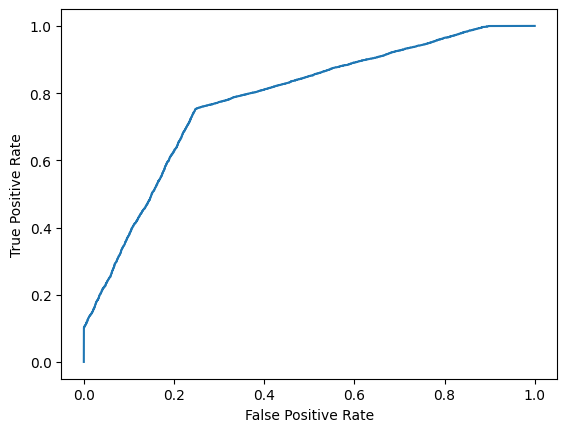

In [117]:
plot_roc_curve(y, y_prob_1)

Plot Model 2:

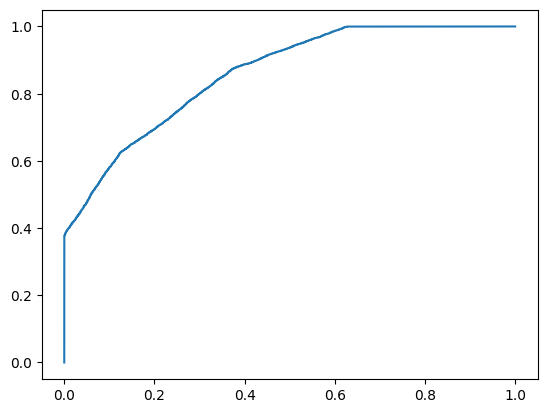

In [119]:
fpr, tpr, thresholds = roc_curve(y, y_prob_2)
plt.plot(fpr, tpr)

Even though the accuracies for the two models are similar, the model with the higher AUC score will be more reliable because it takes into account the predicted probability. It is more likely to give you higher accuracy when predicting future data.

Even though the accuracies for the two models are similar, the model with the higher AUC score will be more reliable because it takes into account the predicted probability. It is more likely to give you higher accuracy when predicting future data.